In [ ]:
from keras.datasets import imdb
import numpy as np

Using TensorFlow backend.


In [ ]:
# !pip install numpy==1.16.2

In [ ]:
print(np.__version__)

1.16.2


In [ ]:
numwords = 22000
((XT, YT), (Xt, Yt)) = imdb.load_data(num_words=numwords)

In [ ]:
print(XT.shape)
print(YT.shape)

print(Xt.shape)
print(Yt.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
word2idx = imdb.get_word_index()

In [ ]:
print(type(word2idx))

<class 'dict'>


In [ ]:
print(len(word2idx))

88584


In [ ]:
print(word2idx['had'])

66


In [ ]:
idx2word = dict([value, key] for (key, value) in word2idx.items())

In [ ]:
print(type(idx2word))

<class 'dict'>


In [ ]:
print(len(idx2word))

88584


In [ ]:
actual_review = ' '.join(idx2word.get(idx-3, '?') for idx in XT[0])

In [ ]:
print(actual_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for 

### Vectorizing the Data
- Vocab size = 10,000
- Every sentence is represented by a vector of shape (10000, ) and is composed of 0s and 1s
- If current sentence has ith word of vocab , ith index is 1 else 0

In [ ]:
def vectorize_sentences(sentences, dim=numwords):
  outputs = np.zeros((len(sentences), dim))
  for i, idx in enumerate(sentences):
    outputs[i, idx] = 1
    
  return outputs

In [ ]:
X_train = vectorize_sentences(XT)
X_test = vectorize_sentences(Xt)

In [ ]:
print(X_train.shape)
print(type(X_train))

print(X_test.shape)
print(type(X_test))

(25000, 22000)
<class 'numpy.ndarray'>
(25000, 22000)
<class 'numpy.ndarray'>


In [ ]:
print(X_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
print(YT[:10])

[1 0 0 1 0 0 1 0 1 0]


In [ ]:
Y_train = np.asarray(YT).astype('float32')
Y_test = np.asarray(Yt).astype('float32')

In [ ]:
print(Y_train[:10])

[1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


### Defining Model Architecture
- Use fully connected (Dense) layers with ReLU activation
- 2 hidden layers with 16 units each
- 1 output unit with 1 unit (sigmoid activation)

In [ ]:
from keras import models
from keras.layers import Dense

#### Define the model

In [ ]:
model = models.Sequential()

model.add(Dense(32, activation='relu', input_shape=(numwords, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


#### Compile the model

In [ ]:
# Specify:
# 1. Loss (measure how good/bad model performs)
# 2. Optimizer (to adjust weights in backprop to minimise loss) 
# 3. Metrics (how to compare performance)


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                704032    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 704,577
Trainable params: 704,577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Layer 1 : 10000 inputs x 16 units + 16 bias terms        => 160016 parameters
# Layer 2 : 16 prev layer units x 16 units + 16 bias terms => 272 parameters
# Layer 3 : 16 prev layer units x 1 unit + 1 bias term     => 17 parameters

#### Training and Validation

In [ ]:
# We have more number of parameters than number of training examples, so it is highly likely that the model will overfit
# Solution: We divide 25000 examples of training set into training set + validation set (20000 + 5000)
# We train on training set and check accuracy of model on validation set
# When validation accuracy starts decreasing: means model is overfitting (ie, it tries to learn the examples) ==> We stop at this point => EARLY STOPPING

In [ ]:
X_val = X_train[:5000]
Y_val = Y_train[:5000]

X_train_new = X_train[5000:]
Y_train_new = Y_train[5000:]

In [ ]:
hist = model.fit(X_train_new, Y_train_new, epochs=20, validation_data=(X_val, Y_val), batch_size=512)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 6s 314us/step - loss: 0.4482 - acc: 0.8118 - val_loss: 0.3370 - val_acc: 0.8678
Epoch 2/20
20000/20000 [==============================] - 6s 287us/step - loss: 0.2335 - acc: 0.9218 - val_loss: 0.2725 - val_acc: 0.8978
Epoch 3/20
20000/20000 [==============================] - 6s 275us/step - loss: 0.1570 - acc: 0.9487 - val_loss: 0.2625 - val_acc: 0.9024
Epoch 4/20
20000/20000 [==============================] - 6s 277us/step - loss: 0.1147 - acc: 0.9637 - val_loss: 0.2804 - val_acc: 0.8998
Epoch 5/20
20000/20000 [==============================] - 5s 274us/step - loss: 0.0853 - acc: 0.9734 - val_loss: 0.2967 - val_acc: 0.8966
Epoch 6/20
20000/20000 [==============================] - 6s 276us/step - loss: 0.0601 - acc: 0.9832 - val_loss: 0.3278 - val_acc: 0.8924
Epoch 7/20
20000/20000 [==============================] - 6s 277us/step - l

In [ ]:
print(type(hist))

<class 'keras.callbacks.History'>


In [ ]:
h = hist.history    # Dictionary which stores accuracy, loss, validation accuracy and validation loss

In [ ]:
print(type(h))

<class 'dict'>


In [ ]:
print(h.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [ ]:
import matplotlib.pyplot as plt

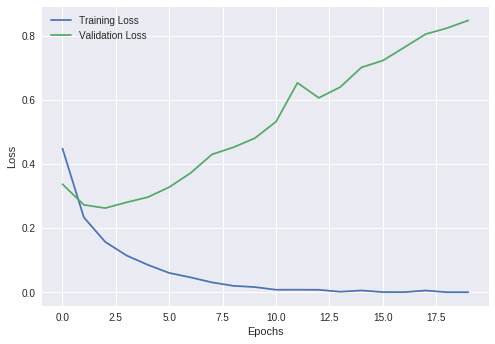

In [ ]:
# With 20 epochs

plt.style.use("seaborn")
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

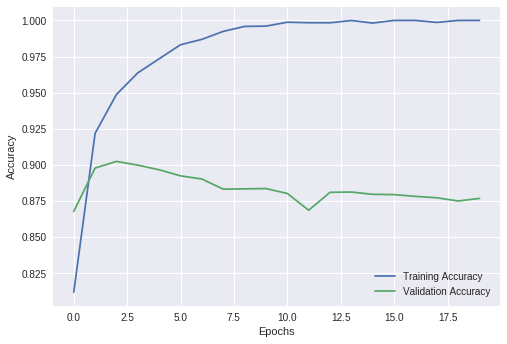

In [ ]:
# With 20 epochs

plt.plot(h['acc'], label='Training Accuracy')
plt.plot(h['val_acc'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
ev = model.evaluate(X_train, Y_train)
print("Final Loss:", ev[0])
print("Final Accuracy:", ev[1]*100, "%")

25000/25000 [==============================] - 6s 227us/step
Final Loss: 0.16965725802409448
Final Accuracy: 97.536 %


In [ ]:
ev = model.evaluate(X_test, Y_test)
print("Final Loss:", ev[0])
print("Final Accuracy:", ev[1]*100, "%")

25000/25000 [==============================] - 6s 224us/step
Final Loss: 1.0033543241906167
Final Accuracy: 85.016 %


In [ ]:
model = models.Sequential()

# model.add(Dense(64, activation='relu', input_shape=(numwords, )))
model.add(Dense(32, activation='relu', input_shape=(numwords, )))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

hist = model.fit(X_train_new, Y_train_new, epochs=3, validation_data=(X_val, Y_val), batch_size=512)
h = hist.history

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 6s 301us/step - loss: 0.4456 - acc: 0.8127 - val_loss: 0.3157 - val_acc: 0.8824
Epoch 2/3
20000/20000 [==============================] - 6s 284us/step - loss: 0.2289 - acc: 0.9226 - val_loss: 0.2714 - val_acc: 0.8928
Epoch 3/3
20000/20000 [==============================] - 6s 285us/step - loss: 0.1596 - acc: 0.9479 - val_loss: 0.2963 - val_acc: 0.8842


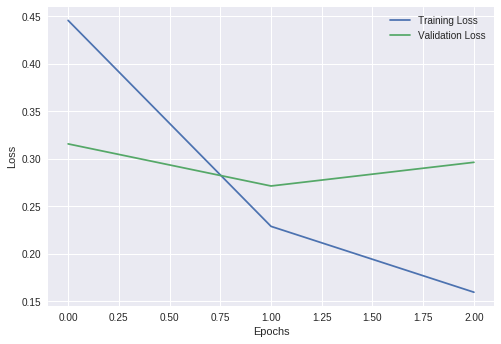

In [ ]:
# With 3 or 4 epochs

plt.style.use("seaborn")
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

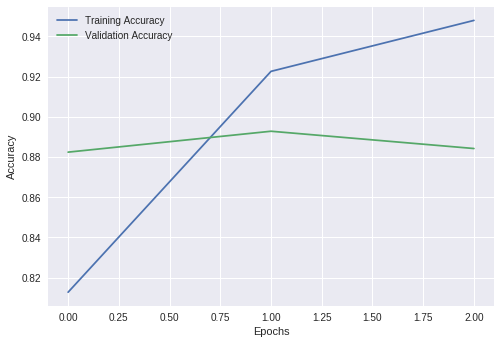

In [ ]:
# With 3 or 4 epochs

plt.plot(h['acc'], label='Training Accuracy')
plt.plot(h['val_acc'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
ev = model.evaluate(X_train, Y_train)
print("Final Loss:", ev[0])
print("Final Accuracy:", ev[1]*100, "%")

25000/25000 [==============================] - 5s 211us/step
Final Loss: 0.16065524024248123
Final Accuracy: 94.312 %


In [ ]:
ev = model.evaluate(X_test, Y_test)
print("Final Loss:", ev[0])
print("Final Accuracy:", ev[1]*100, "%")

# Final Accuracy: 87.592 % with 2 layers of 16 and 16 units, and 3 epochs
# Final Accuracy: 88.62 % with 2 layers of 32 and 16 units, and 2 epochs
# Final Accuracy: 87.932 % with 3 layers of 64, 32, 16 units, and 3 epochs
# Final Accuracy: 87.364 % with 2 layers of 32, 16 units, 3 epochs

# Final Accuracy: 87.688 % with 2 layers of 32, 16 units, 3 epochs and Adam optimizer
# Final Accuracy: 88.712 % with 2 layers of 32, 16 units, 2 epochs and Adam optimizer
# Final Accuracy: 88.244 % with 2 layers of 32, 16 units, 3 epochs and Adam optimizer


25000/25000 [==============================] - 5s 216us/step
Final Loss: 0.31867332604408266
Final Accuracy: 87.068 %


In [ ]:
Y_ = model.predict(X_test)

In [ ]:
print(Y_)

[[0.13197598]
 [0.9989141 ]
 [0.57949156]
 ...
 [0.05497608]
 [0.07257593]
 [0.35558897]]


In [ ]:
Y_[Y_ >= 0.5] = 1
Y_[Y_ < 0.5] = 0
print(Y_)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [0.]
 [0.]]


In [ ]:
np.sum(Y_.reshape(25000,) == Y_test)/Y_test.shape[0]*100

85.7

In [ ]:
Y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)